age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
No missing values present 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memo

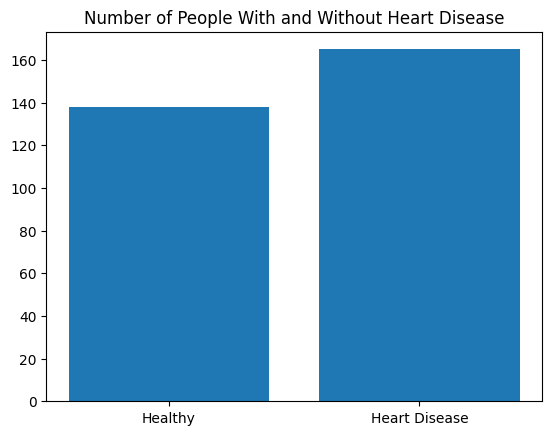

In [4]:
# 2.1 Preprocess the raw data

#     Check whether there are missing values
#     Check whether theare are cateogrical features
#     Check whether this dataset is balanced or not (use the bar plot to visualize the number of positive and negative samples)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from random import shuffle
import random
random.seed(123)

df = pd.read_csv('heart.csv')


print(df.isnull().sum())
print('No missing values present \n')

print(df.info())
print('No categorical values present \n')

plt.bar(df['target'].value_counts().index, df['target'].value_counts().values, tick_label=['Heart Disease', 'Healthy'])
plt.title('Number of People With and Without Heart Disease')
print('The dataset is balanced')

In [15]:

# 2.2 Split the data into two subsets and normalize the features of samples

#     Split the dataset into the train_val set and testing set.
#     Normalize features

heartData = df.drop('target', axis=1).values
heartDisease = df['target'].values
X_train_val, X_test, y_train_val, y_test = train_test_split(heartData, heartDisease, 
                                                            test_size=0.14, 
                                                            random_state=0)

print("train_val: {}, test: {}".format(X_train_val.shape[0], X_test.shape[0]))

normalizer = StandardScaler()
X_train_val = normalizer.fit_transform(X_train_val)
X_test = normalizer.transform(X_test)

train_val: 260, test: 43


In [17]:
# 1.3 Train the logistic regression model and select the hyperparameter with cross-validation

# Here, we use the following logistic regression model to do cancer classification.
# We need to learn the model parameter . However, with different hyperparameters , we can get different model parameter,
# resulting in different prediction performance. Here, we use the 5-fold cross-validation to select the hyperparameter.

# here we use 10-fold cross-validation
folds = 10

# get the number of samples in the training and validation set
num_train_val = X_train_val.shape[0] 

# shuffle the index of samples in the train_val set
index_of_samples = np.arange(num_train_val) 
shuffle(index_of_samples)

# split the index of the train_valid set into 5 folds
index_of_folds = index_of_samples.reshape(folds, -1)
print(index_of_folds)

# potential hyperparameters. 
#These hyperparameters are just used for illustration. 
#You should try more hyperparameters to get a good model.
#The hyperparameters must be nonnegative!
regularization_coefficient = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10, 20, 50, 100]

best_acc = 0.0
best_reg = 0.0

for reg in regularization_coefficient:
    
    # 10-fold cross-validation
    sum_acc = 0.0
    for fold in range(folds):
        
        index_of_folds_temp = index_of_folds.copy()
        
        valid_index = index_of_folds_temp[fold,:].reshape(-1) #get the index of the validation set
        train_index = np.delete(index_of_folds_temp, fold, 0).reshape(-1) #get the index of the training set
        
        # training set
        X_train = X_train_val[train_index]
        y_train = y_train_val[train_index]
        
        # validation set
        X_valid = X_train_val[valid_index]
        y_valid = y_train_val[valid_index]
                
        # build the model with different hyperparameters
        clf = LogisticRegression(penalty='l2', C=reg, solver='lbfgs')
        
        #train the model with the training set
        clf.fit(X_train, y_train)
        
        y_valid_pred = clf.predict(X_valid)
        acc = accuracy_score(y_valid, y_valid_pred)
        
        sum_acc += acc
    
    cur_acc = sum_acc / folds
    
    print("reg_coeff: {}, acc: {:.3f}".format(1.0/reg, cur_acc))
    
    # store the best hyperparameter
    if cur_acc > best_acc:
        best_acc = cur_acc
        best_reg = reg
        
print('The most accurate hyperparameter is ' + str(best_reg))

[[ 71 219 200  27 214 212 223  53 147  72 247   7 140  92  87 107 109 132
   90 231 154  66 180 169 120 208]
 [163 210 178 151  65 160 206 244 108  91  17   8 165  96  99 238 185  74
  203 259 126 125 137 122 121 162]
 [ 51  28 175 191 130 139 189 158 105  80 207  98   0 123 252 218 220  20
  136  86  54  31  70 183  84 190]
 [113 117 194  22 144 193 215 201 100 101  82   1  13  11  67  73 250 182
  133 228  29  15 128 199  61  63]
 [ 89  14 138 146  93  95 149  56  16 258  33 164   3  81  57  97 195 255
   69 243   9 216 211 254  47  18]
 [176 186 131 104  23   2 230  52  38 187 143 166  64 237  19 173 181 141
  253 103 221   4  45 242 198  30]
 [127 235 184 135 171 232 229  37 129 112  76  58 225  36 145 217 153 174
  110 224 124 236   5 102  94 148]
 [245 115 249  78 172 226 240 241  26 167  60 168 155 227 134 142  24 202
  111 118  44  21  55 248 233  62]
 [ 25  10  83 251 205 170 159  85 257  40  46   6 114 234  49 196  79 222
  192  12 152 246  48  75  50 209]
 [156  59 157  68 1

accuracy: 0.791, recall: 0.905, precision: 0.731, f1: 0.809,


Text(0.5, 1.0, 'Learned Model Parameters')

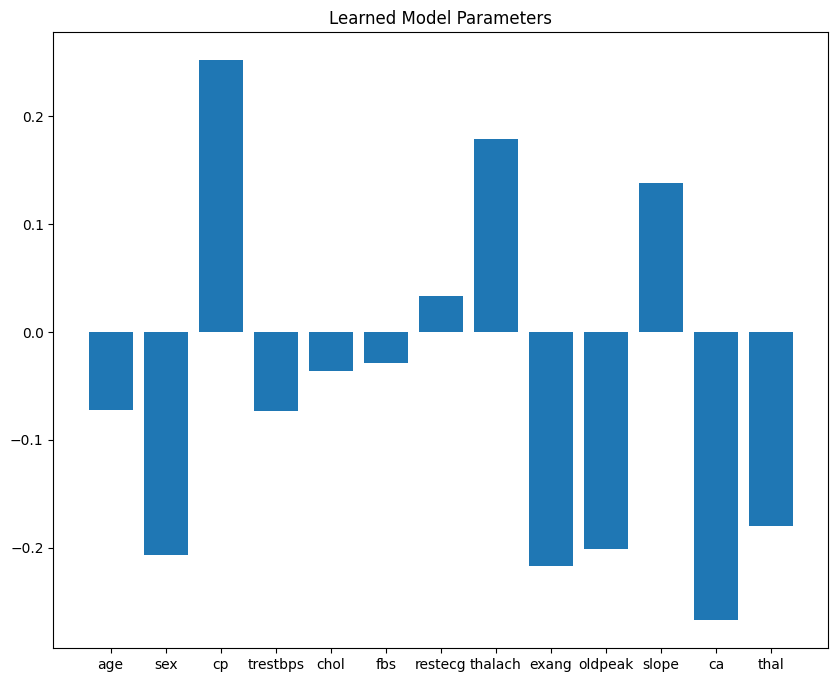

In [18]:

# 2.4 Evaluate the learned model

#     Report the prediction accuracy, recall, precision, and F1 score.

#     Use the bar plot to visulaize the elements of the learned model parameter vector 

# . Some elements have larger absolute values, while the others do not. Try to explain this phenomenon.

# retrain the model
clf = LogisticRegression(penalty='l2', C=best_reg, solver='lbfgs')
clf.fit(X_train_val, y_train_val)

# evaluate the model on the testing set
y_test_pred = clf.predict(X_test)


acc = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)


print("accuracy: {:.3f}, recall: {:.3f}, precision: {:.3f}, f1: {:.3f},".format(acc, recall, precision, f1))

fig = plt.figure(1, [10, 8])
plt.bar(df.columns[:-1], clf.coef_[0], figure=fig)
plt.title('Learned Model Parameters')

In [26]:
print('The elements that contain the larger absolute values are those that influence the prediction the most. '
     'By this, I mean that the there is a positive correlation between the magnitude of the variable and the effect it has on the prediction.'
     ' For example, it is seen that chest pain "cp," has a strong correlation with predicted heart disease. '
     'This makes sense because chest pain is a common symptom of heart disease, as well as the number of major vessels "ca," which also majorly factors into heart disease.'
     ' Furthermore, those that have the relatively smaller absolute values are those that do not have as much of an effect on the prediction. '
     'This is because the data does not show a correlation between the two, as seen with fasting blood sugar, "fbs."'
     ' The fbs is not very indicative of heart disease in an individual, and it is mainly used to screen for diabetes and other related diseases, so it makes sense that its absolute value is not as large.')

The elements that contain the larger absolute values are those that influence the prediction the most. By this, I mean that the there is a positive correlation between the magnitude of the variable and the effect it has on the prediction. For example, it is seen that chest pain "cp," has a strong correlation with predicted heart disease. This makes sense because chest pain is a common symptom of heart disease, as well as the number of major vessels "ca," which also majorly factors into heart disease. Furthermore, those that have the relatively smaller absolute values are those that do not have as much of an effect on the prediction. This is because the data does not show a correlation between the two, as seen with fasting blood sugar, "fbs." The fbs is not very indicative of heart disease in an individual, and it is mainly used to screen for diabetes and other related diseases, so it makes sense that its absolute value is not as large.
